In [ ]:
from datasets import load_dataset

ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


- # Sample size


- Stability of Mean with Increasing Sample Size increase to 0.4%

DatasetDict({
    full: Dataset({
        features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
        num_rows: 23911390
    })
})
Total number of rows: 23911390
New sample size (0.4% of population): 95646
Sampled dataset: Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 95646
})


Creating json from Arrow format:   0%|          | 0/96 [00:00<?, ?ba/s]

Sample saved to sampled_data_0_4_percent.jsonl


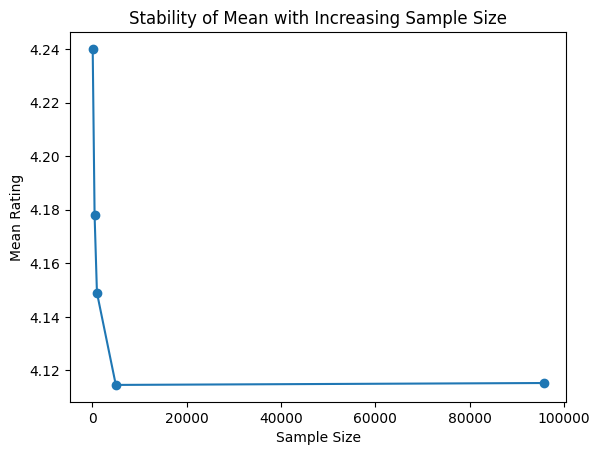

In [ ]:
from datasets import load_dataset
from math import ceil
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Beauty_and_Personal_Care")
print(ds)

# Access the 'full' split
split_name = 'full'
population_size = len(ds[split_name])
print(f"Total number of rows: {population_size}")

# Step 2: Calculate 0.4% Increased Sample Size
increase_percentage = 0.004  # 0.4%
additional_sample_size = ceil(population_size * increase_percentage)
new_sample_size = additional_sample_size
print(f"New sample size (0.4% of population): {new_sample_size}")

# Step 3: Randomly Sample the Dataset
sampled_ds = ds[split_name].shuffle(seed=42).select(range(new_sample_size))
print(f"Sampled dataset: {sampled_ds}")

# Step 4: Save the Sample
sampled_ds.to_json("sampled_data_0_4_percent.jsonl")
print("Sample saved to sampled_data_0_4_percent.jsonl")

# Step 5: Evaluate Sample Stability
# Analyze a metric across different sample sizes
sample_sizes = [100, 500, 1000, 5000, new_sample_size]
means = []

for size in sample_sizes:
    sample = ds[split_name].shuffle(seed=42).select(range(size))
    mean_rating = sum(sample['rating']) / len(sample)  # Replace 'rating' with the actual column
    means.append(mean_rating)

# Plot the stability of the mean
plt.plot(sample_sizes, means, marker='o')
plt.xlabel('Sample Size')
plt.ylabel('Mean Rating')
plt.title('Stability of Mean with Increasing Sample Size')
plt.show()


# EDA

- Check basic information about the dataset

In [ ]:
# Inspect the column names
print(ds[split_name].column_names)

# Convert to pandas DataFrame for easier exploration
ds_df = ds[split_name].to_pandas()

# Check basic information about the dataset
print(ds_df.info())

['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911390 entries, 0 to 23911389
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   rating             float64
 1   title              object 
 2   text               object 
 3   images             object 
 4   asin               object 
 5   parent_asin        object 
 6   user_id            object 
 7   timestamp          int64  
 8   helpful_vote       int64  
 9   verified_purchase  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 1.6+ GB
None


- Compute descriptive statistics for numerical columns

In [ ]:
# Compute descriptive statistics for numerical columns
print(ds_df[['rating', 'helpful_vote', 'timestamp']].describe())

             rating  helpful_vote     timestamp
count  2.391139e+07  2.391139e+07  2.391139e+07
mean   4.111859e+00  1.150738e+00  1.563529e+12
std    1.410143e+00  1.316797e+01  8.886742e+10
min    1.000000e+00  0.000000e+00  9.545766e+11
25%    4.000000e+00  0.000000e+00  1.500055e+12
50%    5.000000e+00  0.000000e+00  1.582928e+12
75%    5.000000e+00  1.000000e+00  1.634285e+12
max    5.000000e+00  1.193100e+04  1.694623e+12


- Distribution of Ratings

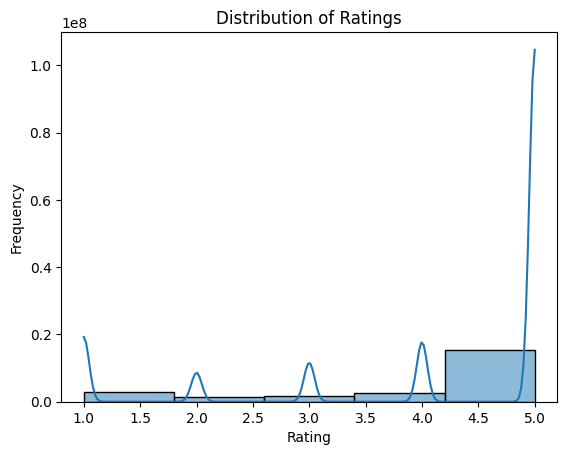

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of ratings
sns.histplot(ds_df['rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

- Distribution of Helpful Votes (Log Scale)

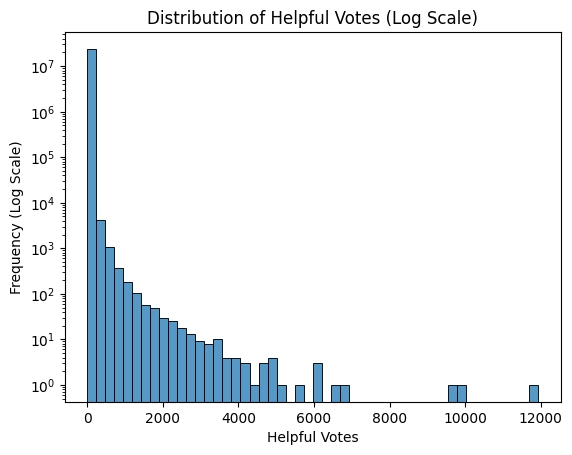

In [ ]:
# Plot distribution of helpful votes (log scale for better visualization)
sns.histplot(ds_df['helpful_vote'], bins=50, kde=False)
plt.yscale('log')
plt.title('Distribution of Helpful Votes (Log Scale)')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency (Log Scale)')
plt.show()

- Distribution of Review Lengths

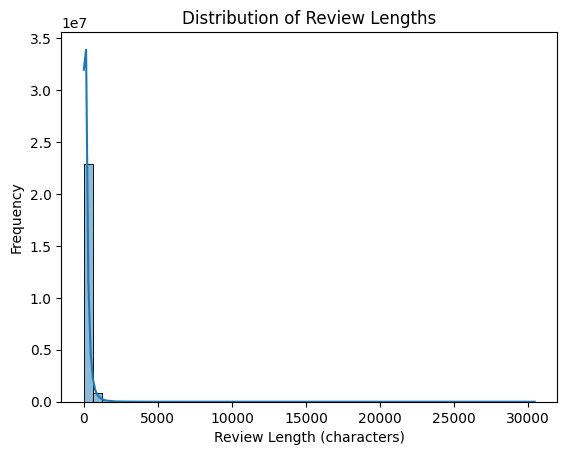

In [ ]:
# Add a new column for review length
ds_df['review_length'] = ds_df['text'].apply(lambda x: len(str(x)))

# Plot the distribution of review lengths
sns.histplot(ds_df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()

- Correlation Matrix

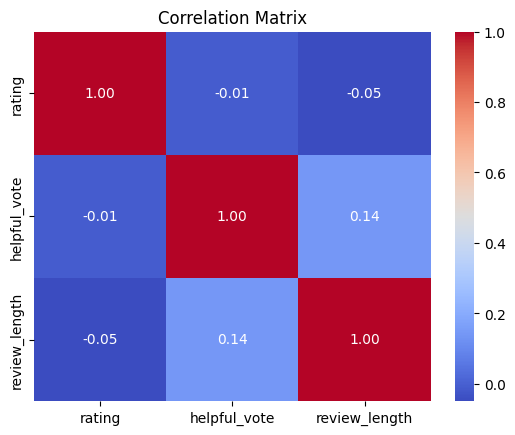

In [ ]:
# Compute the correlation matrix
correlation_matrix = ds_df[['rating', 'helpful_vote', 'review_length']].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- Yearly Trend of Average Ratings

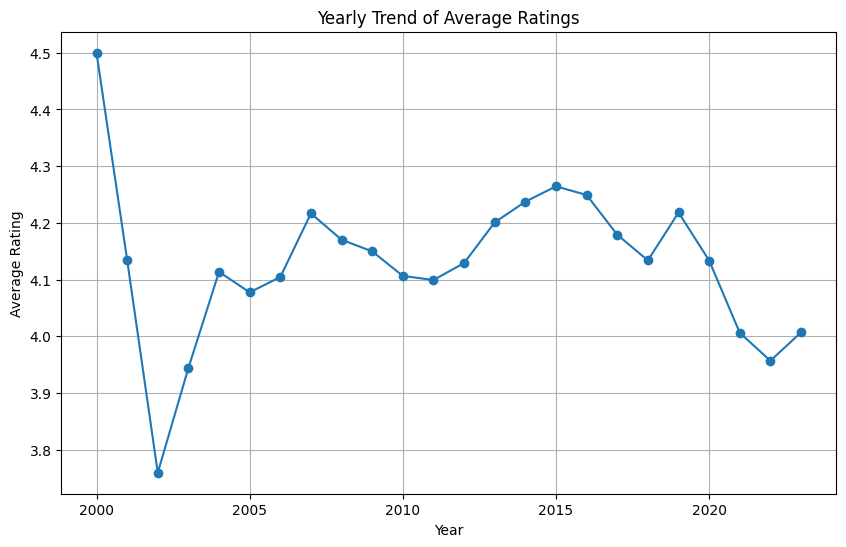

In [ ]:
# Import pandas
import pandas as pd

# Convert 'timestamp' to datetime
ds_df['timestamp'] = pd.to_datetime(ds_df['timestamp'], unit='ms')

# Extract year and month for trend analysis
ds_df['year'] = ds_df['timestamp'].dt.year
ds_df['month'] = ds_df['timestamp'].dt.month

# Aggregate average rating by year
yearly_trends = ds_df.groupby('year')['rating'].mean()

# Plot yearly trends of average rating
plt.figure(figsize=(10, 6))
yearly_trends.plot(marker='o')
plt.title('Yearly Trend of Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

- Average Ratings: Verified vs Non-Verified Purchases

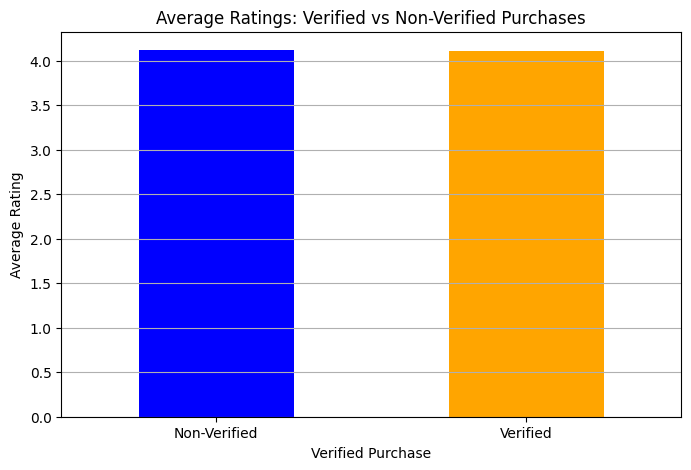

In [ ]:
# Calculate average rating for verified and non-verified purchases
verified_ratings = ds_df.groupby('verified_purchase')['rating'].mean()

# Plot the comparison
verified_ratings.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 5))
plt.title('Average Ratings: Verified vs Non-Verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1], labels=['Non-Verified', 'Verified'], rotation=0)
plt.grid(axis='y')
plt.show()

- Average Helpful Votes: Verified vs Non-Verified Purchases

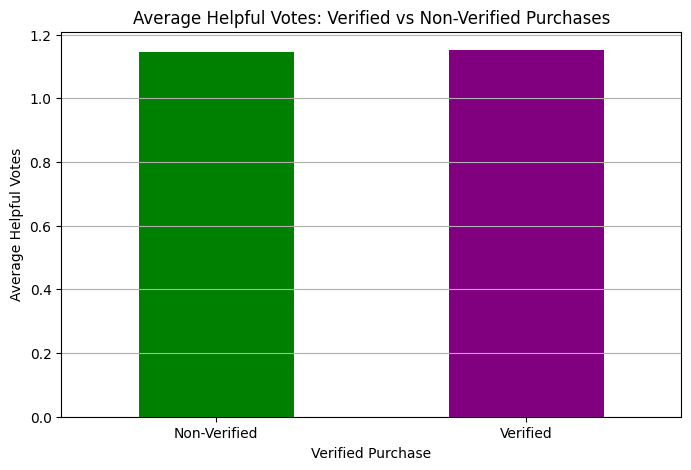

In [ ]:
# Calculate average helpful votes for verified and non-verified purchases
helpful_votes = ds_df.groupby('verified_purchase')['helpful_vote'].mean()

# Plot the comparison
helpful_votes.plot(kind='bar', color=['green', 'purple'], figsize=(8, 5))
plt.title('Average Helpful Votes: Verified vs Non-Verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Average Helpful Votes')
plt.xticks(ticks=[0, 1], labels=['Non-Verified', 'Verified'], rotation=0)
plt.grid(axis='y')
plt.show()

- Distribution of Ratings: Verified vs Non-Verified Purchases

<ipython-input-15-5277929f2ea9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ds_df[ds_df['verified_purchase'] == True]['rating'], label='Verified Purchase', shade=True)
<ipython-input-15-5277929f2ea9>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ds_df[ds_df['verified_purchase'] == False]['rating'], label='Non-Verified Purchase', shade=True)


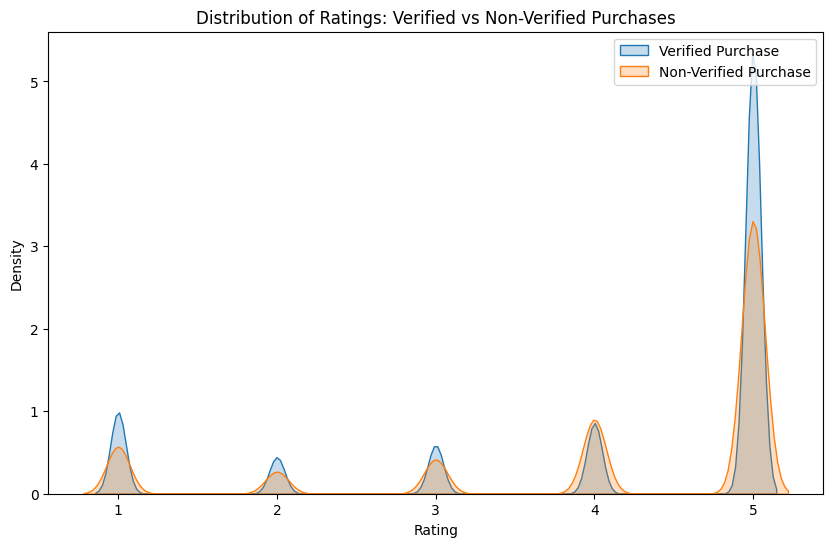

In [ ]:
# Plot separate distributions for verified and non-verified purchases
plt.figure(figsize=(10, 6))

# Verified purchases
sns.kdeplot(ds_df[ds_df['verified_purchase'] == True]['rating'], label='Verified Purchase', shade=True)

# Non-verified purchases
sns.kdeplot(ds_df[ds_df['verified_purchase'] == False]['rating'], label='Non-Verified Purchase', shade=True)

plt.title('Distribution of Ratings: Verified vs Non-Verified Purchases')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()

- Relationship Between Review Length and Ratings

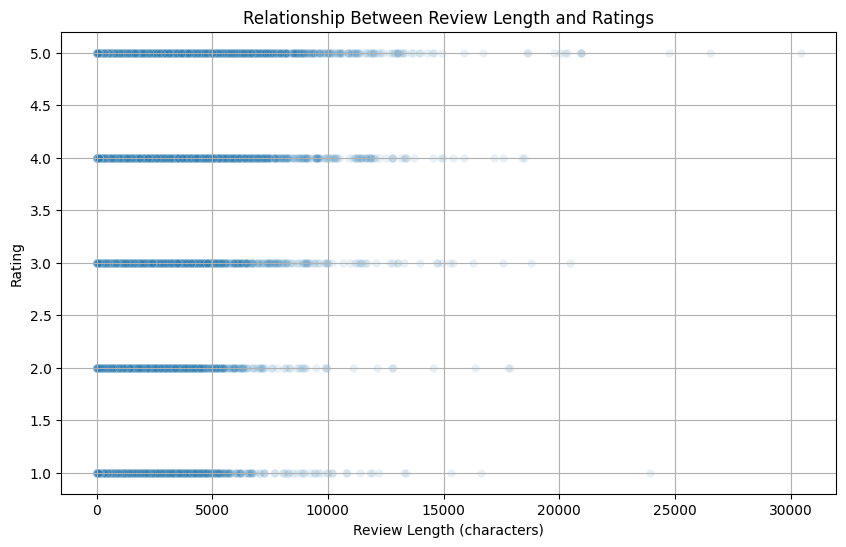

In [ ]:
# Scatter plot of review length vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds_df, x='review_length', y='rating', alpha=0.1)

plt.title('Relationship Between Review Length and Ratings')
plt.xlabel('Review Length (characters)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


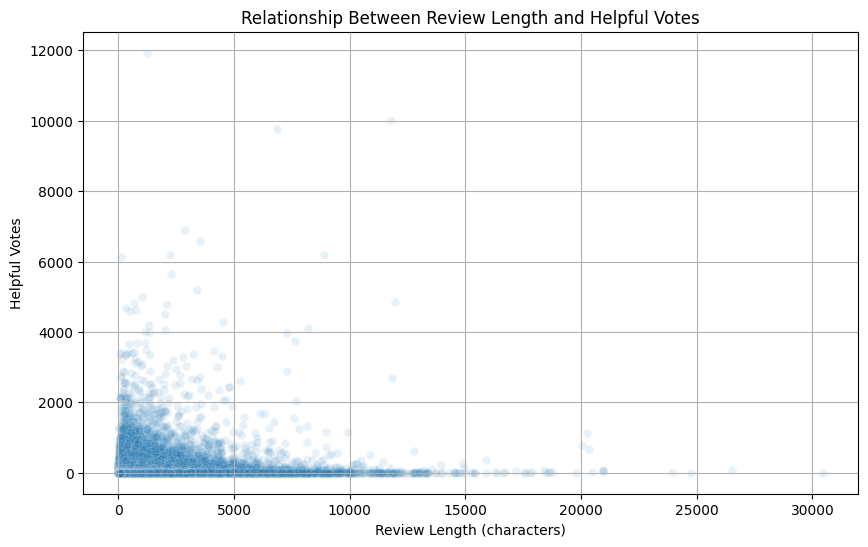

In [ ]:
# Scatter plot of review length vs. helpful votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds_df, x='review_length', y='helpful_vote', alpha=0.1)

plt.title('Relationship Between Review Length and Helpful Votes')
plt.xlabel('Review Length (characters)')
plt.ylabel('Helpful Votes')
plt.grid(True)
plt.show()

<ipython-input-19-1620ead0da65>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_helpful_by_length = ds_df.groupby('review_length_bins')['helpful_vote'].mean()


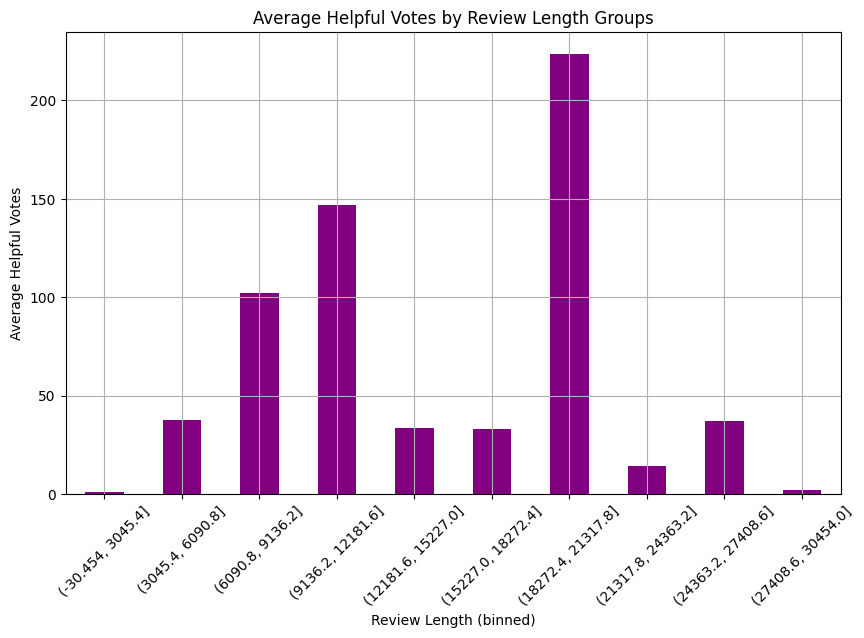

In [ ]:
# Average helpful votes by review length bins
avg_helpful_by_length = ds_df.groupby('review_length_bins')['helpful_vote'].mean()

# Plot the average helpful votes
plt.figure(figsize=(10, 6))
avg_helpful_by_length.plot(kind='bar', color='purple')
plt.title('Average Helpful Votes by Review Length Groups')
plt.xlabel('Review Length (binned)')
plt.ylabel('Average Helpful Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()